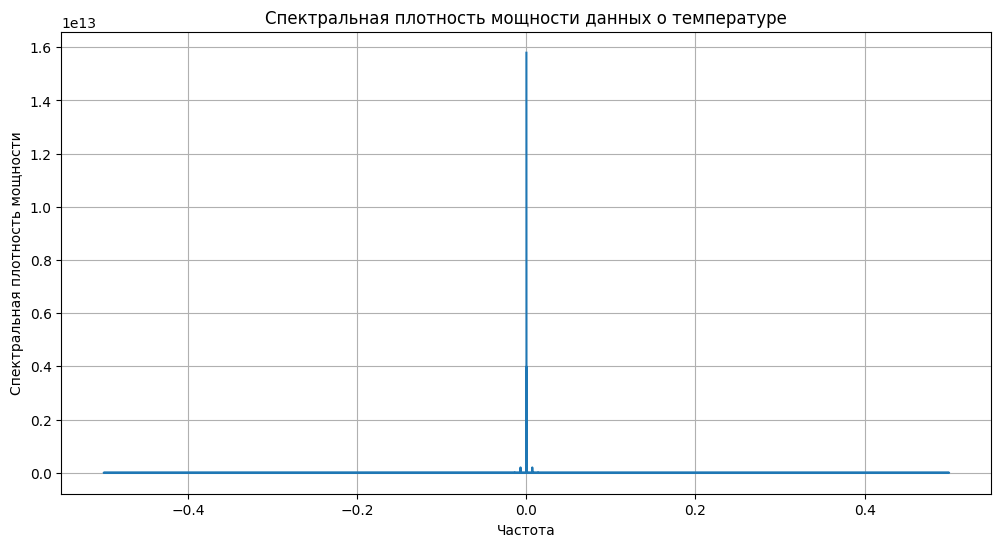

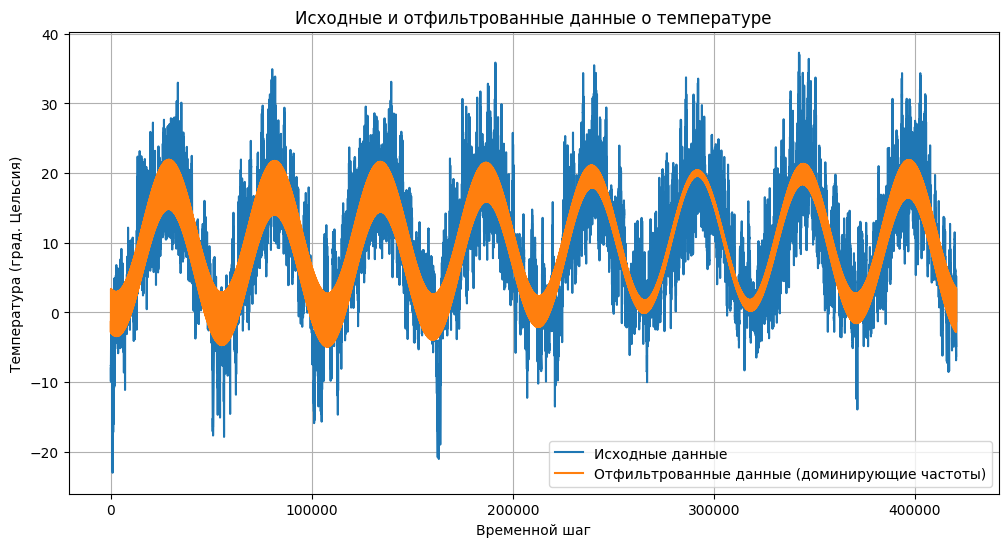

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/content/jena_climate_2009_2016.csv')

# Извлечение данных о температуре
temperature_data = df['T (degC)'].values

# Применение преобразования Фурье
fft_result = np.fft.fft(temperature_data)
frequencies = np.fft.fftfreq(len(temperature_data))

# Расчет спектральной плотности мощности
power_spectrum = np.abs(fft_result)**2

# Построение графика спектральной плотности мощности
plt.figure(figsize=(12, 6))
plt.plot(frequencies, power_spectrum)
plt.xlabel('Частота')
plt.ylabel('Спектральная плотность мощности')
plt.title('Спектральная плотность мощности данных о температуре')
plt.grid(True)
plt.show()

# Определение доминирующих частот (исключая нулевую частоту)
threshold_factor = 0.01
threshold = threshold_factor * np.max(power_spectrum[1:]) # Исключаем постоянную составляющую
dominant_frequencies_indices = np.where(power_spectrum > threshold)[0]

# Создание отфильтрованного результата БПФ путем обнуления недоминирующих частот
filtered_fft_result = np.zeros_like(fft_result)
filtered_fft_result[dominant_frequencies_indices] = fft_result[dominant_frequencies_indices]

# Применение обратного преобразования Фурье для получения отфильтрованного временного ряда
filtered_temperature_data = np.fft.ifft(filtered_fft_result).real

# Построение графика исходного и отфильтрованного временных рядов
plt.figure(figsize=(12, 6))
plt.plot(temperature_data, label='Исходные данные')
plt.plot(filtered_temperature_data, label='Отфильтрованные данные (доминирующие частоты)')
plt.xlabel('Временной шаг')
plt.ylabel('Температура (град. Цельсия)')
plt.title('Исходные и отфильтрованные данные о температуре')
plt.legend()
plt.grid(True)
plt.show()